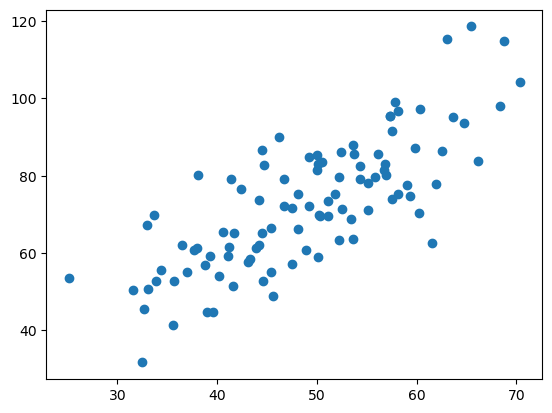

In [17]:
### 0 引入依赖
import numpy as np
import matplotlib.pyplot as plt
 
### 1 导入数据
points = np.genfromtxt('data.csv',delimiter=',')
 
## points 二维数组
##[[ 32.50234527,  31.70700585],
##[ 53.42680403,  68.77759598]]
 
## 提取points 中的两列数据，分别作为x,y 
x=points[:,0]##第一列 
y=points[:,1]##第二列
 
## 用plt画出散点图 
plt.scatter(x,y)
plt.show()

# """ 使用最小二乘法，拟合出一元线性回归模型：z = wx + b。
# 一元的意思是样本x通过一个属性描述，原本可能是矢量x_i = (x_i1, x_i2...,x_id)被例如颜色，大小...
# 属性描述，现在只有一个x_i1描述，则直接把矢量x_i看成标量，w也是标量

# 计算出使得损失最小的w和b，
# 画出拟合直线和原始的散点图
# 点距离拟合直线越远，代表误差越大


w is : 1.3224310227553846
b is : 7.991020982269173
cost is : 110.25738346621313


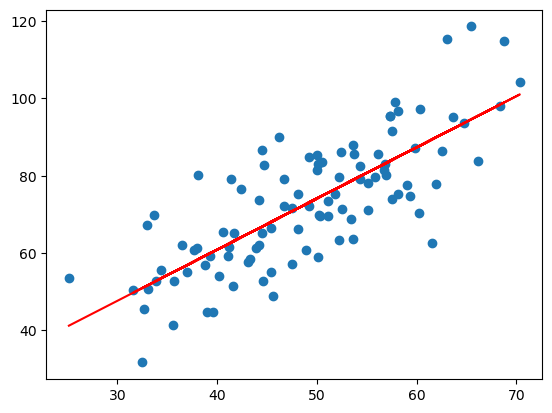

In [19]:
### 2. 定义损失函数
#损失函数是系数的函数，另外还要传入数据的x,y 
def compute_cost(w,b,points):
    total_cost = 0 
    M = len(points)
    
    # 逐点计算平方损失误差，然后求平均数
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        total_cost+= (y - w*x - b)**2  ## 这个对应最小二乘法函数
        
    return total_cost/M
 
### 3.定义算法拟合函数
 
# 先定义求均值的函数 
def average(data):
    sum = 0 
    num = len(points)
    for i in range(num):
        sum += data[i]
    return sum/num
 
# 定义核心拟合函数 
def fit(points):
    M = len(points)
    x_bar = average(points[:,0]) ##传入所有的第一列 并求均值
    
    sum_yx = 0 
    sum_x2 = 0 
    sum_delta=0
    
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        sum_yx += y * ( x - x_bar )  ## 对应求偏导W的分子部分
        sum_x2 += x ** 2             
    # 根据公式计算W
    w=sum_yx/(sum_x2- M *(x_bar**2)) ## 对应求偏导W公式
    
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        sum_delta+= (y - w*x )  ##对应求偏导b公式
    b = sum_delta / M
    
    return w,b
 
### 4. 测试
w,b=fit(points) ## 计算出 最小二乘法系数
print("w is :",w)
print("b is :",b)
 
cost=compute_cost(w,b,points)
print("cost is :",cost)
 
 
## 5.拟合曲线
plt.scatter(x,y) ##散点图
# 针对每一个x,计算出预测的y值
pred_y = w * x + b  #ny 可以用一个常数与向量直接相乘，对应原特征公式
 
plt.plot(x,pred_y,c='r') ##点图
plt.show()